In [1]:
##Question no.1 Predict delivery time using sorting time 

In [2]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # used for data analysis and data maipulation  
import numpy as np # used for working with arrays
import seaborn as sns # used for visualization
from scipy.stats import norm # used statistics for normal distribution
from scipy.stats import skew # to handle skewness
import statsmodels.formula.api as smf # to Create a Model from a formula and dataframe
import matplotlib.pyplot as plt # used for visualization

In [3]:
dataset = pd.read_csv("delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
print(skew(dataset.delivery_time))

0.326702631656106


<AxesSubplot:xlabel='delivery_time'>

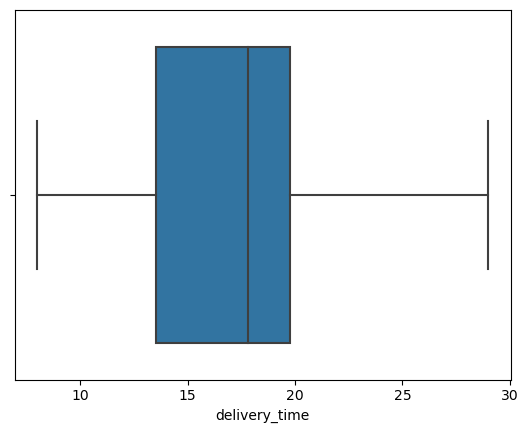

In [8]:
sns.boxplot(dataset['delivery_time'], orient = 'h')

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

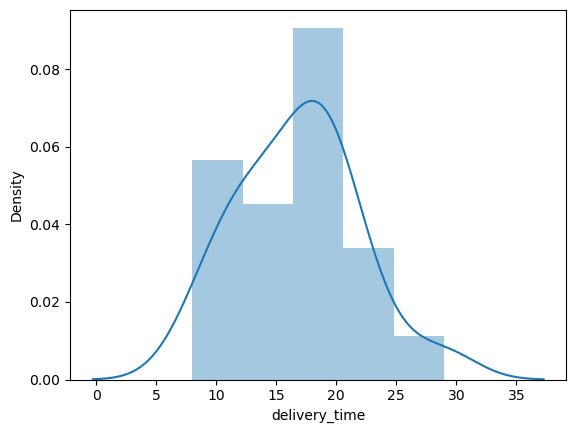

In [9]:
sns.distplot(dataset['delivery_time'])

In [10]:
print(skew(dataset.sorting_time))

0.043680994983108075


<AxesSubplot:xlabel='sorting_time'>

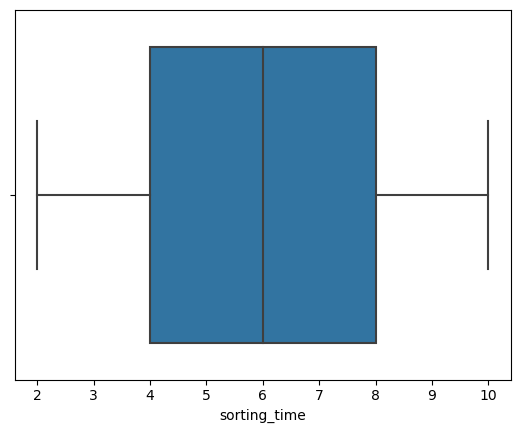

In [11]:
sns.boxplot(dataset['sorting_time'], orient='h')

In [12]:
# The observations for Sorting Time lies nearly between 4 to 8.
# It means the Sorting Time data is symmetric and skewed.
# The median sorting time is approximately around 6.

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

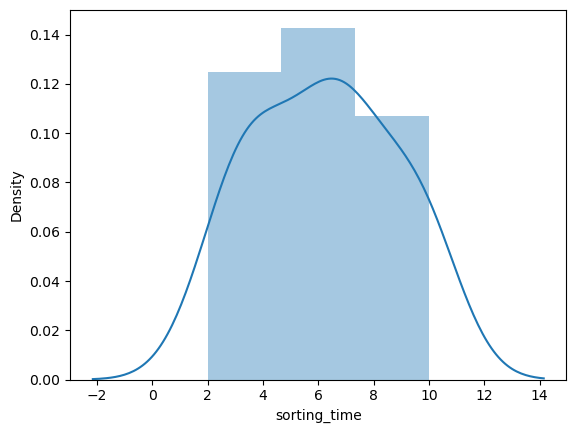

In [13]:
sns.distplot(dataset['sorting_time'])

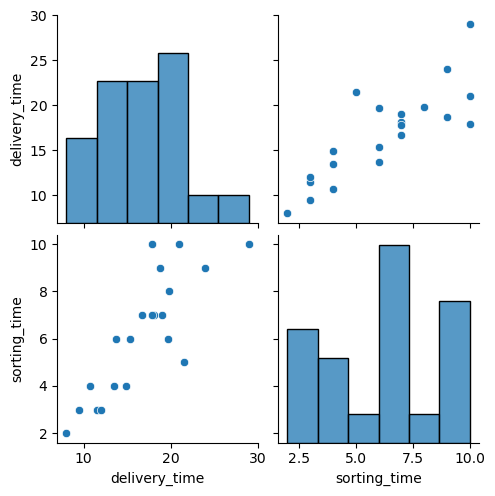

In [14]:
sns.pairplot(dataset)

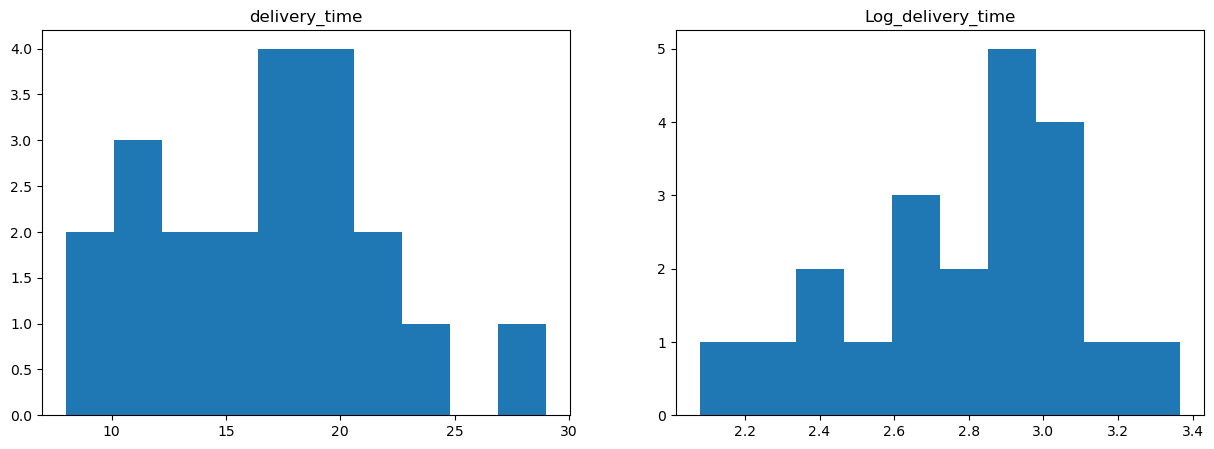

In [15]:
# log trasformation :
dataset['log_delivery_time']= np.log(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("delivery_time")
ax[1].hist(dataset['log_delivery_time']);ax[1].set_title("Log_delivery_time")
plt.show()

Text(0.5, 1.0, 'Log_Sorting Time')

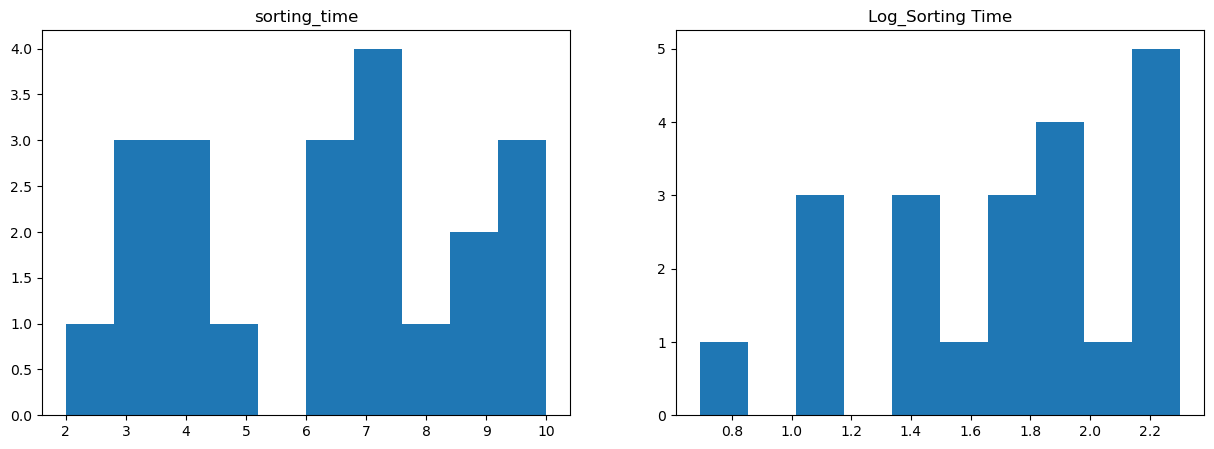

In [16]:
dataset['log_sorting_time']= np.log(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("sorting_time")
ax[1].hist(dataset['log_sorting_time']);ax[1].set_title("Log_Sorting Time")

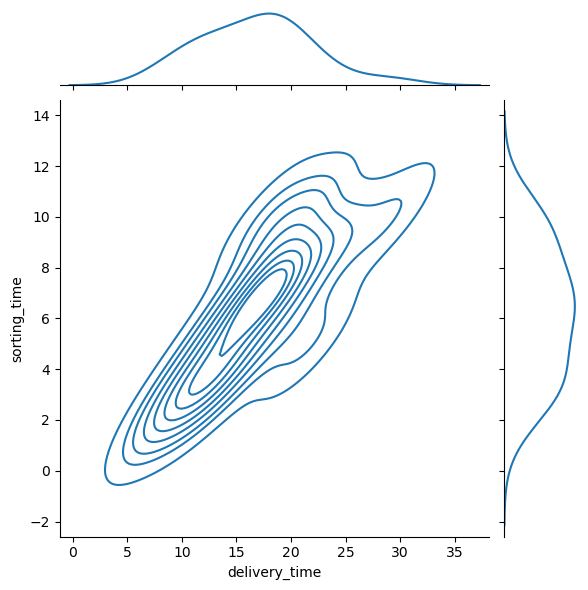

In [17]:
sns.jointplot(dataset['delivery_time'],dataset['sorting_time'], kind='kde')
plt.show()

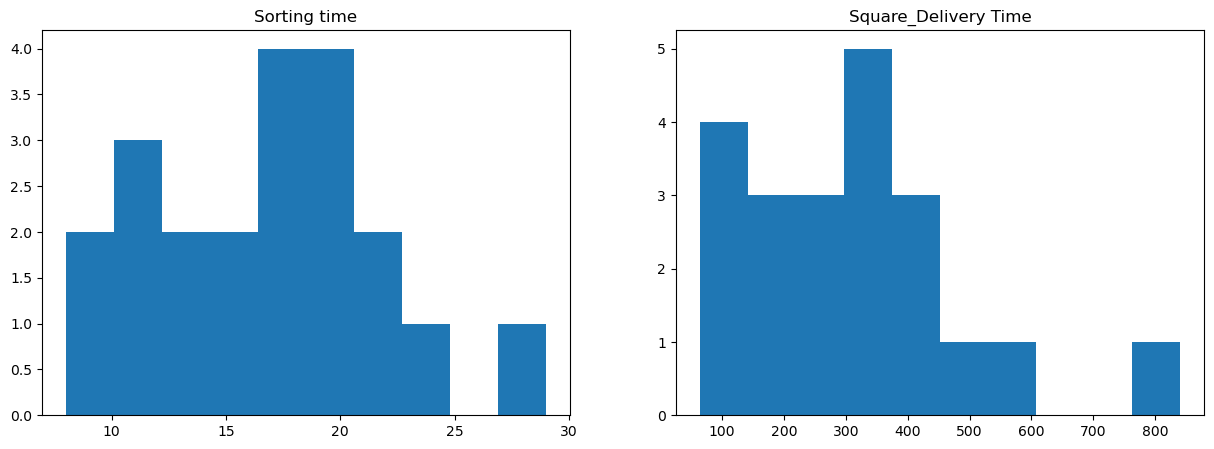

In [18]:
# square transformation :
dataset['sqr_delivery_time']= np.square(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("Sorting time")
ax[1].hist(dataset['sqr_delivery_time']);ax[1].set_title("Square_Delivery Time")
plt.show()

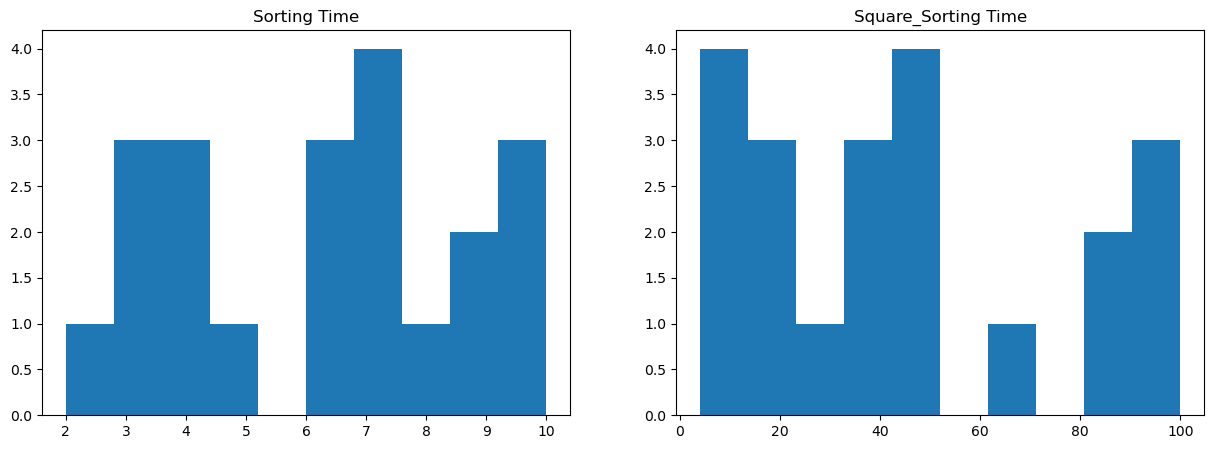

In [19]:
dataset['sqr_sorting_time'] = np.square(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("Sorting Time")
ax[1].hist(dataset['sqr_sorting_time']);ax[1].set_title("Square_Sorting Time")
plt.show()

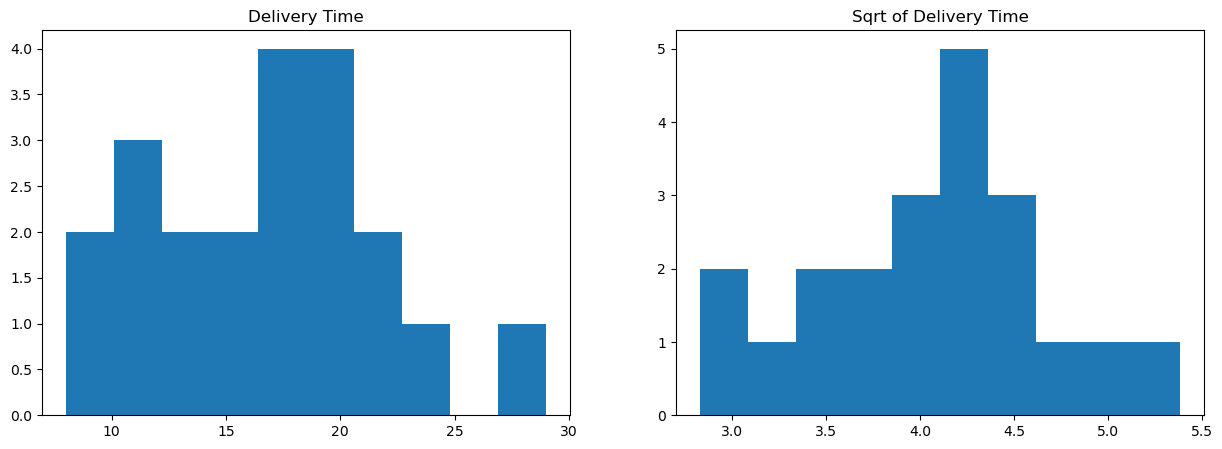

In [20]:
# square root transformation:
dataset['sqrt_delivery_time'] = np.sqrt(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("Delivery Time")
ax[1].hist(dataset['sqrt_delivery_time']);ax[1].set_title("Sqrt of Delivery Time")
plt.show()

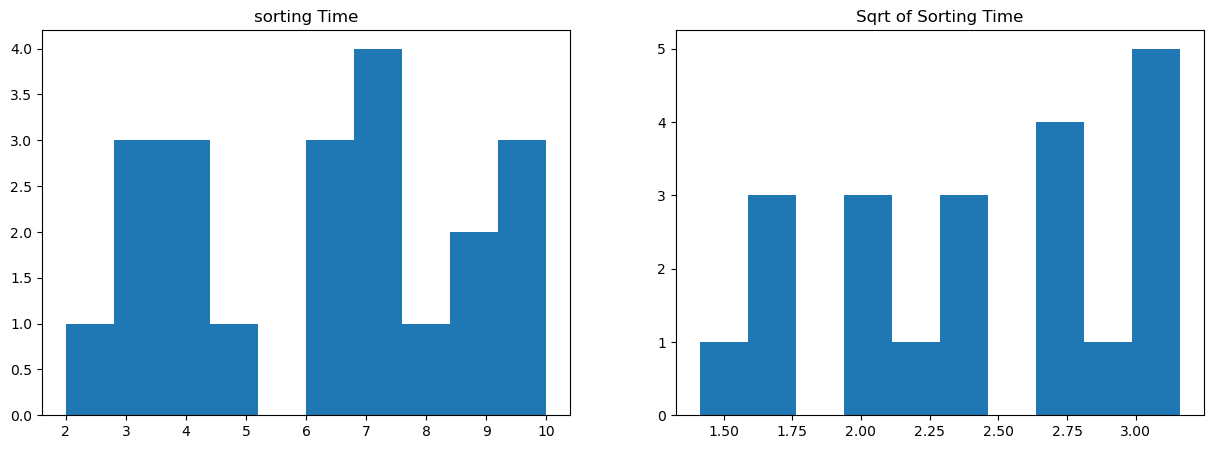

In [21]:
dataset['sqrt_sorting_time'] = np.sqrt(dataset["sorting_time"])

fit, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("sorting Time")
ax[1].hist(dataset['sqrt_sorting_time']);ax[1].set_title("Sqrt of Sorting Time")
plt.show()

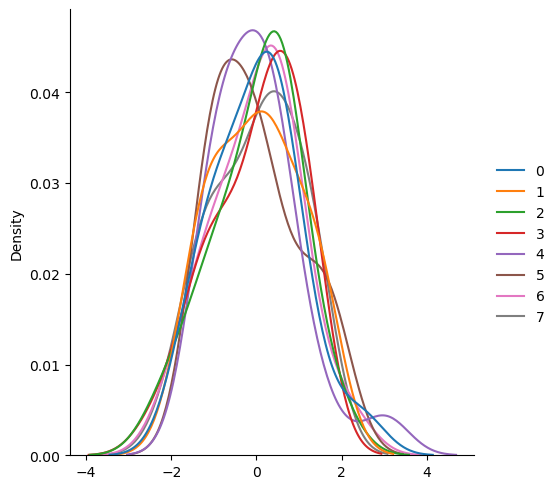

In [22]:
from sklearn.preprocessing import scale
dataset1 = dataset.values
dataset2 = scale(dataset1) # used to standarized the dataset
sns.displot(dataset2, kind='kde')
plt.show()

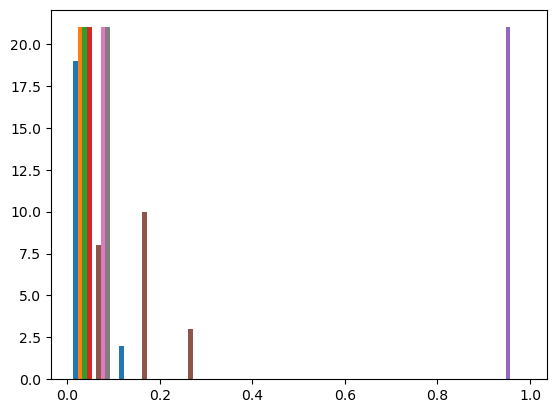

In [23]:
#Normalize Data set
from sklearn.preprocessing import normalize
dataset2 = normalize(dataset)
plt.hist(dataset2)
plt.show()

In [24]:
#Model building
model1 = smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [25]:
#model testing
##Coeffiecient
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [26]:
#Finding t and p-values
model1.tvalues, model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        00:38:47   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Finding Rsquared values
model1.rsquared, model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [29]:
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [30]:
# Automatic Prediction for say sorting time 6, 8
new_data = pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [31]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [32]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64